# clustering kmeans

# unsupervised machine learning

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
os.getcwd()
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("spending_score.csv")

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


Text(0, 0.5, 'Count')

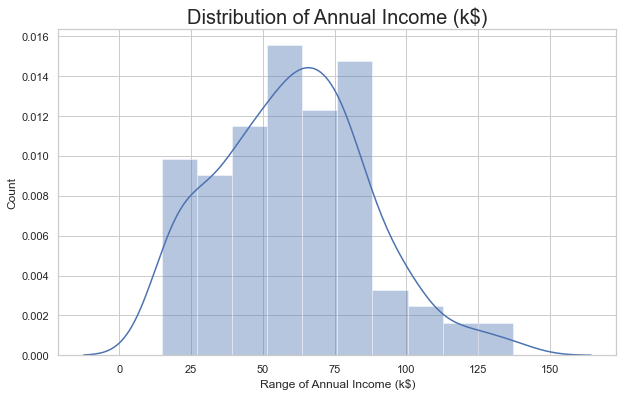

In [5]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

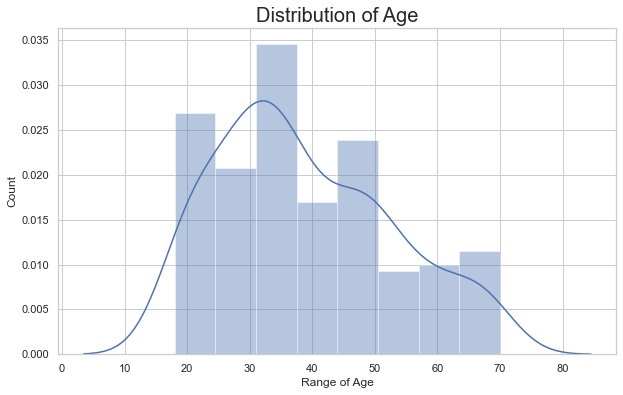

In [6]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

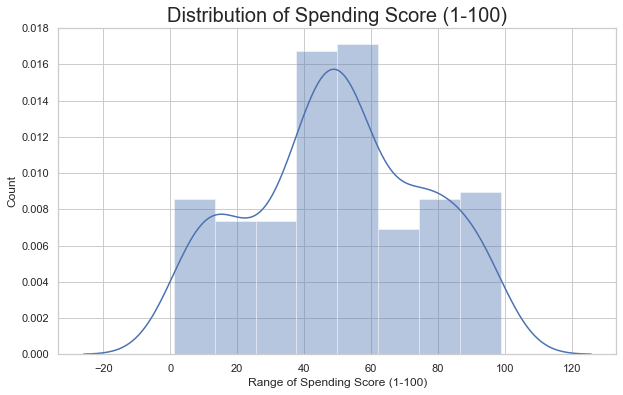

In [7]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

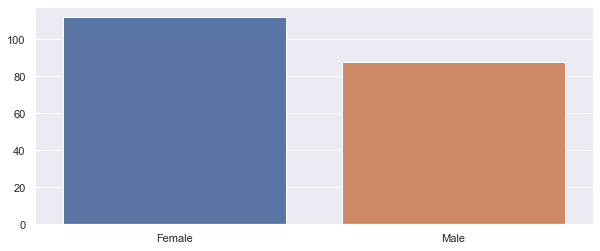

In [8]:
genders = data.Genre.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [9]:
#We take just the Annual Income and Spending score
df1=data[["CustomerID","Genre","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [10]:
#The input data
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


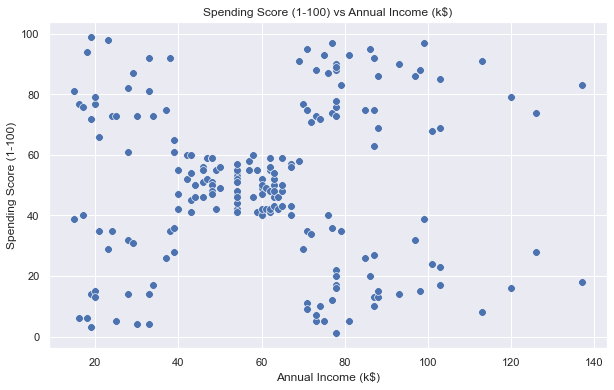

In [11]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X,s=60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [12]:
# clustering kmeans
"""

It is a centroid based algorithm in which each cluster is associated with a centroid. 

The main idea is to reduce the distance between the data points and their respective 
cluster centroid.

The algorithm takes raw unlabelled data as an input and divides the dataset 
into clusters and the process is repeated until the best clusters are found.

K-Means is easy and simple to implement. It is highly scalable, 
can be applied to both small and large datasets. 

Requirement:- Choosing the number of clusters or K. 

The first step is to randomly select k centroids, where k is equal to 
the number of clusters you choose. 
Centroids are data points representing the center of a cluster.


The quality of the cluster assignments is determined by 
computing the sum of the squared error (SSE) after the centroids converge, 
or match the previous iteration’s assignment. 
The SSE is defined as the sum of the squared Euclidean distances of each point
to its closest centroid. 
Since this is a measure of error, the objective of k-means is to try to minimize this value.
The figure below shows the centroids and SSE updating through the first five iterations from 
two different runs of the k-means algorithm on the same dataset:


"""

'\n\nIt is a centroid based algorithm in which each cluster is associated with a centroid. \n\nThe main idea is to reduce the distance between the data points and their respective \ncluster centroid.\n\nThe algorithm takes raw unlabelled data as an input and divides the dataset \ninto clusters and the process is repeated until the best clusters are found.\n\nK-Means is easy and simple to implement. It is highly scalable, \ncan be applied to both small and large datasets. \n\nRequirement:- Choosing the number of clusters or K. \n\nThe first step is to randomly select k centroids, where k is equal to \nthe number of clusters you choose. \nCentroids are data points representing the center of a cluster.\n\n\nThe quality of the cluster assignments is determined by \ncomputing the sum of the squared error (SSE) after the centroids converge, \nor match the previous iteration’s assignment. \nThe SSE is defined as the sum of the squared Euclidean distances of each point\nto its closest centroid

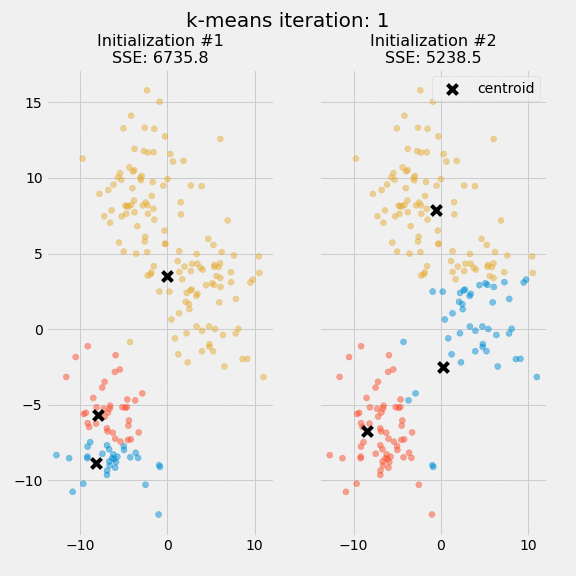# 

# KMeans clustering

In [13]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

In [14]:
# defining the kmeans function with initialization as k-means++
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++',max_iter = 1500)

# fitting the k means algorithm on scaled data
kmeans.fit(X)

KMeans(max_iter=1500, n_clusters=2)

In [15]:
#Let’s evaluate how well the formed clusters are. To do that, we will calculate the inertia of the clusters:

In [16]:
# inertia on the fitted data
kmeans.inertia_

181363.59595959596

In [17]:
"""
We got an inertia value of almost 181363. Now, let’s see how we can use the 
elbow curve to determine the optimum number of clusters in Python.

We will first fit multiple k-means models and in each successive model, 
we will increase the number of clusters. We will store the inertia value of 
each model and then plot it to visualize the result:

"""

'\nWe got an inertia value of almost 181363. Now, let’s see how we can use the \nelbow curve to determine the optimum number of clusters in Python.\n\nWe will first fit multiple k-means models and in each successive model, \nwe will increase the number of clusters. We will store the inertia value of \neach model and then plot it to visualize the result:\n\n'

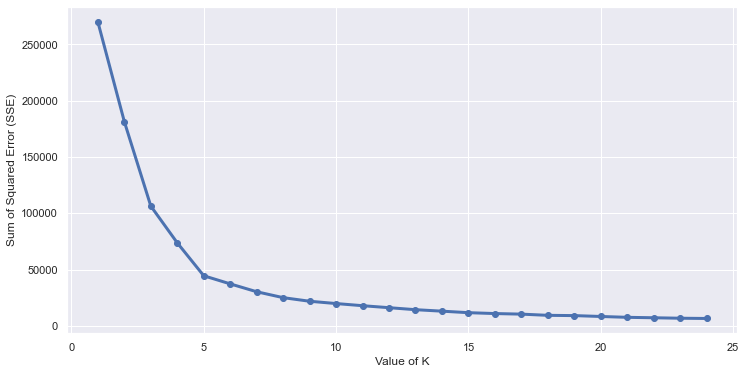

In [18]:
SSE =[]
for i in range(1, 25):
    KM = KMeans(n_clusters = i, max_iter = 1500)
    KM.fit(X)
     
    # calculates squared error
    # for the clustered points
    SSE.append(KM.inertia_)    
 
# plot the cost against K values
plt.figure(figsize=(12,6))
plt.plot(range(1, 25), SSE, color ='b', linewidth ='3',marker='o')
plt.xlabel("Value of K")
plt.ylabel("Sum of Squared Error (SSE)")
plt.show() # clear the plot
 
# the point of the elbow is the
# most optimal value for choosing k

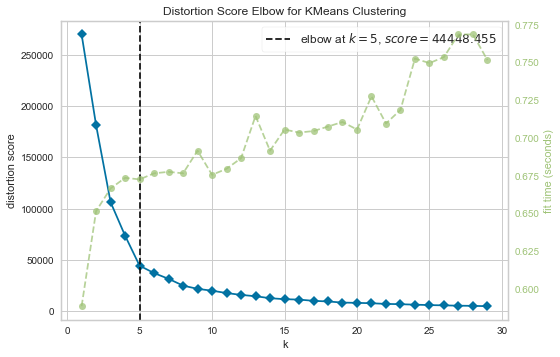

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
# install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,30)).fit(X)
visualizer.show()

In [20]:
"""
Looking at the above elbow curve, we can choose any number of clusters between 5 to 8. 
Let’s set the number of clusters as 5 and fit the model:
"""

'\nLooking at the above elbow curve, we can choose any number of clusters between 5 to 8. \nLet’s set the number of clusters as 5 and fit the model:\n'

In [21]:
#Taking 8 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head(100)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
95,96,Male,24,60,52,1
96,97,Female,47,60,47,1
97,98,Female,27,60,50,1
98,99,Male,48,61,42,1


In [22]:
df1.tail(100)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
100,101,Female,23,62,41,1
101,102,Female,49,62,48,1
102,103,Male,67,62,59,1
103,104,Male,26,62,55,1
104,105,Male,49,62,56,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Age'>

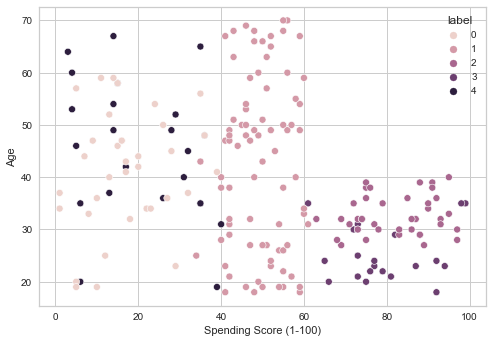

In [23]:
sns.scatterplot(data = df1, x="Spending Score (1-100)", y="Age", hue="label")

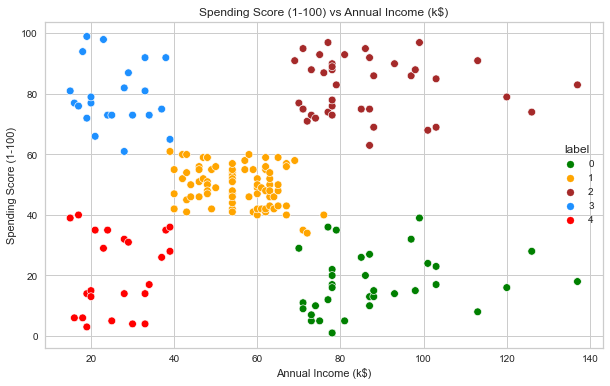

In [24]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], 
                legend='full',data = df1  ,s = 60 )
#palette=['green','orange','brown','dodgerblue','red','yellow','pink','black']
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [25]:
cust1=df1[df1["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df1[df1["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df1[df1["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df1[df1["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df1[df1["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")
cust6=df1[df1["label"]==5]
print('Number of customer in 6th group=', len(cust6))
print('They are -', cust6["CustomerID"].values)
print("--------------------------------------------")
cust7=df1[df1["label"]==6]
print('Number of customer in 7th group=', len(cust7))
print('They are -', cust7["CustomerID"].values)
print("--------------------------------------------")
cust8=df1[df1["label"]==7]
print('Number of customer in 8th group=', len(cust8))
print('They are -', cust7["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 81
They are - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]
--------------------------------------------
Number of customer in 2nd group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------
Number of customer in 3rd group= 35
They are - [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
--------------------------------------------
Number of customer in 4th group= 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 3

# Evaluating Clustering Methods
 

# Silhouette Index

In [26]:
"""
Predicting optimal clusters is of utmost importance in Cluster Analysis.
The Silhouette score is the measure of how similar a data point is to its 
own cluster as compared to other clusters. 
A higher Silhouette score value indicates that the data point is 
better matched to its own cluster 
and badly matched to other clusters. The best score value is 1 and -1 is the worst.
"""

'\nPredicting optimal clusters is of utmost importance in Cluster Analysis.\nThe Silhouette score is the measure of how similar a data point is to its \nown cluster as compared to other clusters. \nA higher Silhouette score value indicates that the data point is \nbetter matched to its own cluster \nand badly matched to other clusters. The best score value is 1 and -1 is the worst.\n'

In [27]:
labels = kmeans.labels_

In [28]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X, labels))

0.2968969162503008


# Dendrogram

In [29]:
"""A dendrogram is a type of tree diagram showing hierarchical clustering — 
relationships between similar sets of data. They are frequently used in biology to show 
clustering between genes or samples, but they can represent any type of grouped data."""

'A dendrogram is a type of tree diagram showing hierarchical clustering — \nrelationships between similar sets of data. They are frequently used in biology to show \nclustering between genes or samples, but they can represent any type of grouped data.'

In [30]:
"""
How to Read a Dendrogram
The clades are arranged according to how similar (or dissimilar) they are. 
Clades that are close to the same height are similar to each other; 
clades with different heights are dissimilar — the greater the difference 
in height, the more dissimilarity """

'\nHow to Read a Dendrogram\nThe clades are arranged according to how similar (or dissimilar) they are. \nClades that are close to the same height are similar to each other; \nclades with different heights are dissimilar — the greater the difference \nin height, the more dissimilarity '

# Dendrograms

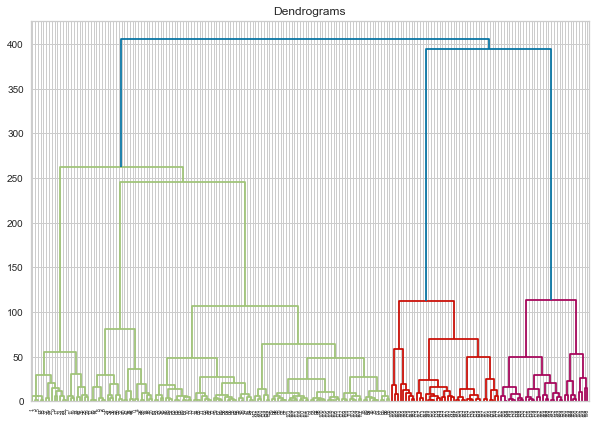

In [31]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [32]:
"""
The x-axis contains the samples and y-axis represents the distance 
between these samples. 
The vertical line with maximum distance is the blue line and hence we can 
decide a threshold of 100 and cut the dendrogram:
"""

'\nThe x-axis contains the samples and y-axis represents the distance \nbetween these samples. \nThe vertical line with maximum distance is the blue line and hence we can \ndecide a threshold of 100 and cut the dendrogram:\n'

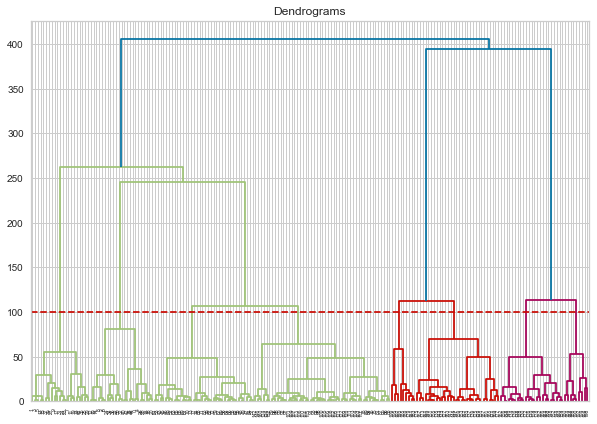

In [33]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=100, color='r', linestyle='--')

In [34]:
"""
We have 8 clusters as this line cuts the dendrogram at 8 points. 
Let’s now apply hierarchical clustering for 8 clusters:
"""

'\nWe have 8 clusters as this line cuts the dendrogram at 8 points. \nLet’s now apply hierarchical clustering for 8 clusters:\n'

In [35]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 7,
       0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 7, 4, 7, 4, 4, 7, 7, 4, 7, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 1, 5, 1, 5, 1,
       4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 4, 1, 5, 1, 4, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 2, 6, 2, 5, 2, 6, 2, 6, 1, 6, 2, 6, 1, 6, 2, 6, 2, 6, 2,
       6, 2], dtype=int64)

In [36]:
"""We can see the values of 0s to 7s in the output since we defined 8 clusters. 
0 represents the points that belong to the first cluster and 7 represents points in the 8 cluster. 
"""

'We can see the values of 0s to 7s in the output since we defined 8 clusters. \n0 represents the points that belong to the first cluster and 7 represents points in the 8 cluster. \nLet’s now visualize the 8 clusters:'

# Silhouette Index

In [39]:
labels1 = cluster.labels_

In [40]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X, labels1))

0.4326286245782246
